# Random forest feature inspection function

## Inspecting feature importance

### Splitting the data

In [56]:
from sklearn.model_selection import train_test_split
    
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
    return X_train, X_test, y_train, y_test

### Building the Random forest classifier

In [ ]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 

def train_rf_model(X_train,y_train):
    # Random forest model
    rf = RandomForestClassifier()

    # Fitting the model
    rf.fit(X_train, y_train)

    # Predicting values
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    return rf, y_train_pred, y_test_pred    

### Testing with toy dataset from sklearn

In [57]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)

X_train, X_test, y_train, y_test = split_data(X,y)

rf, y_train_pred, y_test_pred = train_rf_model(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Plotting confusion matrix

In [67]:
def plot_confusion_matrix(y_test,y_test_pred):
    from mlxtend.evaluate import confusion_matrix
    from mlxtend.plotting import plot_confusion_matrix
    import matplotlib.pyplot as plt
    from mlxtend.evaluate import confusion_matrix

    # Making sure the inputs are arrays of 1 dim.
    y_test_pred = np.squeeze(np.asarray(y_test_pred))
    y_test = np.squeeze(np.asarray(y_test))


    cm = confusion_matrix(y_target=y_test,y_predicted=y_test_pred,binary=False)
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    # Saving to file
    # fig.savefig('../Data_Plots/confusion_matrices/cm_test.png')

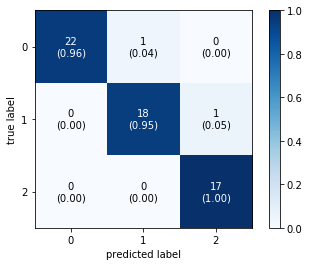

In [66]:
plot_confusion_matrix(y_test,y_test_pred)

## Feature importances

### Get the feature importances

In [59]:
def get_feature_importances(trained_model,X_train):
    feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
    return feature_importances
    

### One function to call them all

In [68]:
def get_model(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    rf, y_train_pred, y_test_pred = train_rf_model(X_train,y_train)
    features_imp = get_feature_importances(rf,X_train)
    plot_confusion_matrix(y_test,y_test_pred)
    return features_imp
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,importance
alcohol,0.227445
od280/od315_of_diluted_wines,0.159279
color_intensity,0.149828
hue,0.099347
flavanoids,0.088144
proline,0.080594
total_phenols,0.060079
alcalinity_of_ash,0.046535
nonflavanoid_phenols,0.032102
malic_acid,0.023856


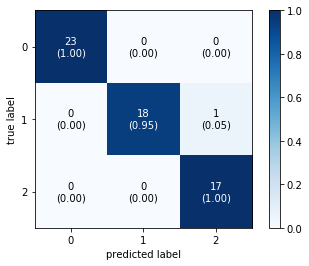

In [69]:
get_model(X,y)